In [131]:
# Importing necessary librares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Load the Titanic dataset from the specified file path
df = pd.read_csv('C:/Users/USER/Documents/Eugenius/School/Internships/CodeAlpha/Task 1/titanic.csv')

# Print the shape of the dataset (number of rows and columns)
print("Dataset shape:", df.shape)

# Display the first few rows of the dataset for a quick preview
display(df.head())

# Print the data types of each column in the dataset
print(df.dtypes)

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [133]:
# Calculate the number of missing values in each column of the dataframe
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [134]:
# Fill missing values in 'Age' with its mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing values in 'Embarked' with its mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify if missing values are filled
print(df.isnull().sum())

# Export the cleaned dataset
df.to_csv('titanic_cleaned.csv', index=False)

# Load the cleaned dataset
df_cleaned = pd.read_csv('titanic_cleaned.csv')
print("Cleaned dataset loaded successfully.")
display(df_cleaned.head())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
Cleaned dataset loaded successfully.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survival counts:
Survived
0    549
1    342
Name: count, dtype: int64


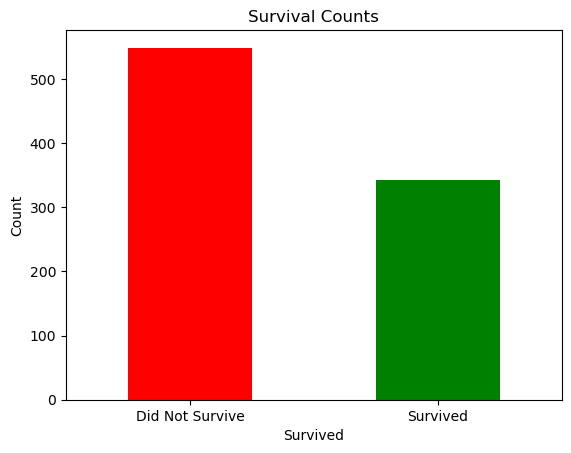

In [ ]:
survival_counts = df['Survived'].value_counts()
print("Survival counts:")
print(survival_counts)

survival_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()

Survival counts by class:


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


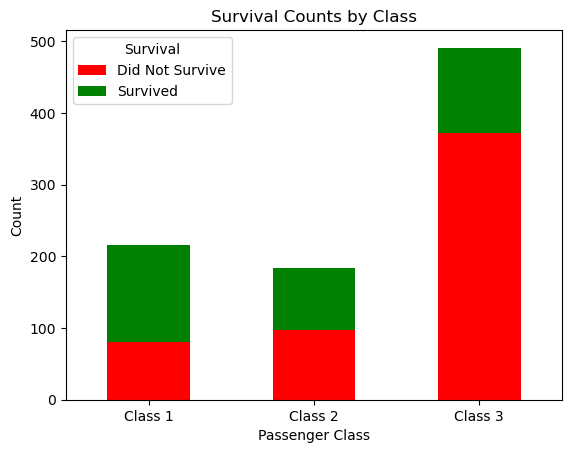

In [98]:
# Group by Pclass and Survived, then count the number of people in each group
class_survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()

# Display the result
print("Survival counts by class:")
display(class_survival_counts)

# Plot the results
class_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Counts by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Class 1', 'Class 2', 'Class 3'], rotation=0)
plt.legend(['Did Not Survive', 'Survived'], title='Survival')
plt.show()

Gender distribution:
Sex
male      577
female    314
Name: count, dtype: int64


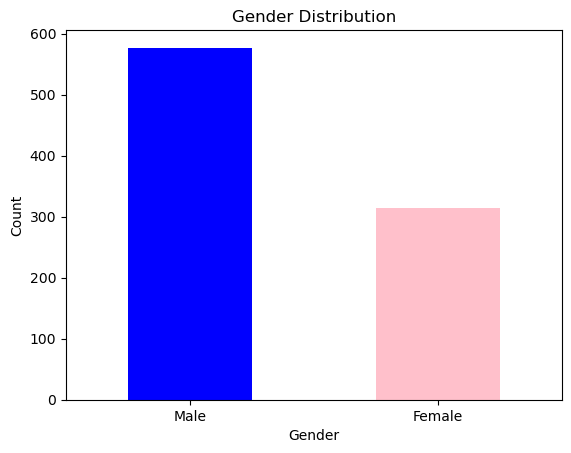

Survival counts by gender:


Survived,0,1
Sex,,
female,81,233
male,468,109


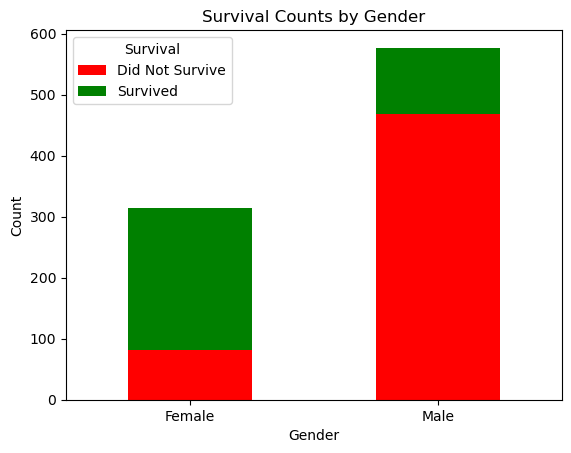

In [99]:
# Calculate gender distribution
gender_distribution = df['Sex'].value_counts()
print("Gender distribution:")
print(gender_distribution)

# Plot gender distribution
gender_distribution.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

# Group by Sex and Survived, then count the number of people in each group
gender_survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()

# Display the result
print("Survival counts by gender:")
display(gender_survival_counts)

# Plot the results
gender_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(['Did Not Survive', 'Survived'], title='Survival')
plt.show()

Survival counts by age group:


Survived,0,1
AgeGroup,,
Adults,463,267
Children,29,40
Old People,17,5
Youths,40,30


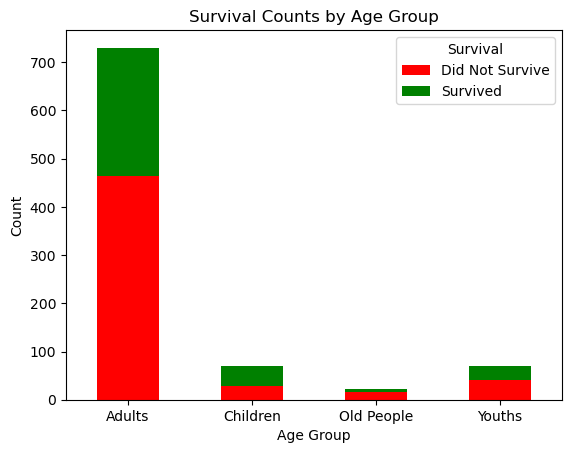

In [100]:
# Define a function to classify ages
def classify_age(age):
    if age <= 12:
        return 'Children'
    elif age <= 18:
        return 'Youths'
    elif age <= 60:
        return 'Adults'
    else:
        return 'Old People'

# Apply the function to create a new column for age groups
df['AgeGroup'] = df['Age'].apply(classify_age)

# Group by AgeGroup and Survived, then count the number of people in each group
age_group_survival = df.groupby(['AgeGroup', 'Survived']).size().unstack()

# Display the result
print("Survival counts by age group:")
display(age_group_survival)

# Plot the results
age_group_survival.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Did Not Survive', 'Survived'], title='Survival')
plt.show()

Survival counts by number of siblings/spouse:


Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


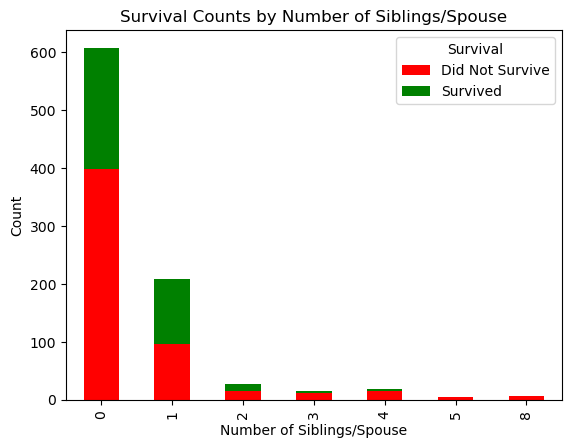

In [101]:
# Group by SibSp and Survived, then count the number of people in each group
sibsp_survival_counts = df.groupby(['SibSp', 'Survived']).size().unstack()

# Display the result
print("Survival counts by number of siblings/spouse:")
display(sibsp_survival_counts)

# Plot the results
sibsp_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Counts by Number of Siblings/Spouse')
plt.xlabel('Number of Siblings/Spouse')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'], title='Survival')
plt.show()

Parents with children survival counts:
Survived
1    109
0    104
Name: count, dtype: int64


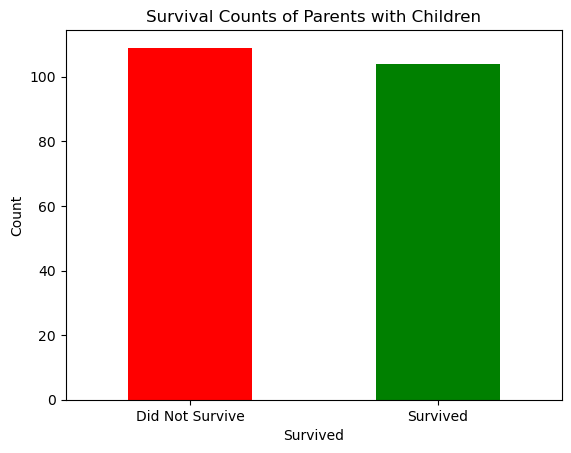

In [102]:
# Filter rows where Parch > 0 (indicating parents or children are present)
parents_with_children = df[df['Parch'] > 0]

# Group by Survived and count the number of parents with children
parents_with_children_survival = parents_with_children['Survived'].value_counts()

# Display the result
print("Parents with children survival counts:")
print(parents_with_children_survival)

# Plot the results
parents_with_children_survival.plot(kind='bar', color=['red', 'green'])
plt.title('Survival Counts of Parents with Children')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()

Number of people embarked on each port:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


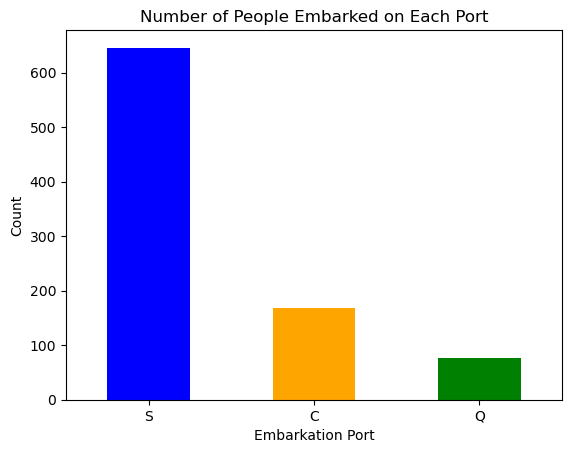

In [103]:
embarked_counts = df['Embarked'].value_counts()
print("Number of people embarked on each port:")
print(embarked_counts)

# Plot the number of people embarked on each port
embarked_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Number of People Embarked on Each Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Survival counts by class:


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


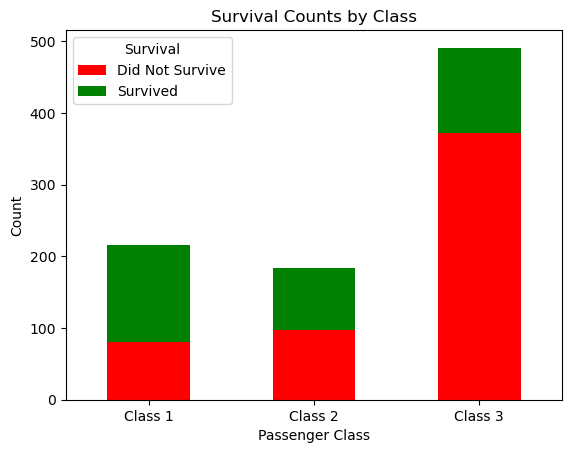

In [104]:
# Group by Pclass and Survived, then count the number of people in each group
class_survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()

# Display the result
print("Survival counts by class:")
display(class_survival_counts)

# Plot the results
class_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Counts by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Class 1', 'Class 2', 'Class 3'], rotation=0)
plt.legend(['Did Not Survive', 'Survived'], title='Survival')
plt.show()


=== Logistic Regression ===
Accuracy: 0.7989
ROC AUC: 0.8785
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


=== Random Forest ===
Accuracy: 0.8212
ROC AUC: 0.86
Confusion Matrix:
 [[93 12]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


=== SVM ===
Accuracy: 0.6089
ROC AUC: 0.871
Confusion Matrix:
 [[104   1]
 [ 69   5]]
Classification Repo

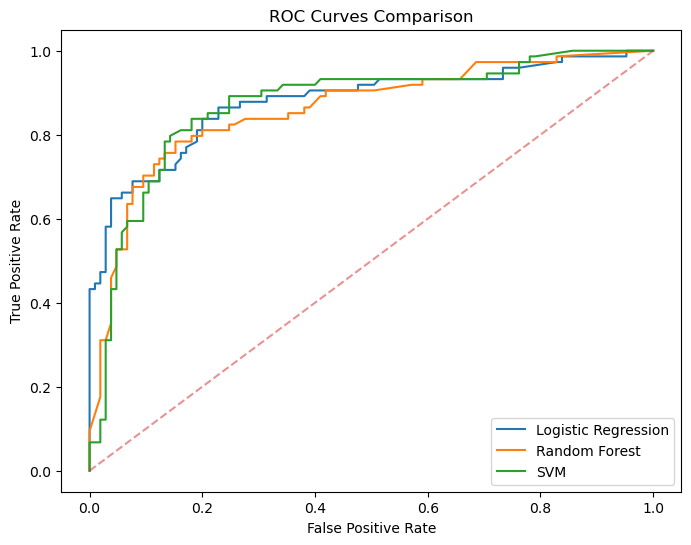

In [127]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

# 3. Train, predict, eval + ROC plot
plt.figure(figsize=(8, 6))
for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    y_proba = m.predict_proba(X_test)[:, 1]
    
    print(f"\n=== {name} ===")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],'--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

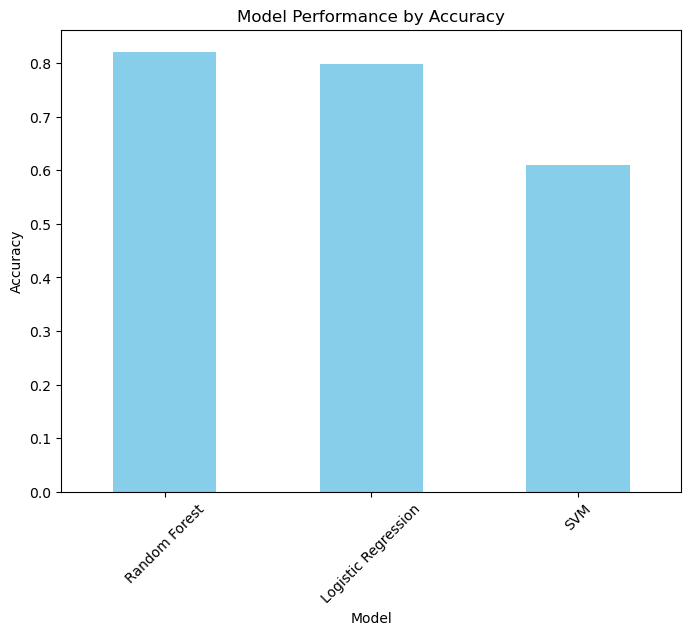

In [137]:
# Sort the performance DataFrame by Accuracy in descending order
performance_df_sorted = performance_df.sort_values(by='Accuracy', ascending=False)

# Plot the accuracy of each model
performance_df_sorted['Accuracy'].plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Model Performance by Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()